In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_model = pd.read_csv(
    "data/processed/model_features_dataset.csv",
    parse_dates=["timestamp"]
)

print("Shape:", df_model.shape)
df_model.head()


Shape: (87259, 39)


,timestamp,TOTALDEMAND,net_demand_after_pv,pv_rooftop_mw,TOTALINTERMITTENTGENERATION,temperature,wind_speed,hour,dayofweek,month,...,TOTALINTERMITTENTGENERATION_lag_12,TOTALINTERMITTENTGENERATION_lag_288,temperature_lag_1,temperature_lag_12,temperature_lag_288,wind_speed_lag_1,wind_speed_lag_12,wind_speed_lag_288,target_rrp,target_log_rrp
0,2025-01-02 00:30:00,7051.85,7051.85,0.0,167.15794,22.2,27.7,0,3,1,...,193.10306,89.49685,22.2,22.2,27.3,27.7,35.3,13.0,76.00048,4.343812
1,2025-01-02 00:35:00,6913.44,6913.44,0.0,165.98690,22.2,27.7,0,3,1,...,201.29928,89.09685,22.2,22.2,27.3,27.7,35.3,13.0,76.00054,4.343812
2,2025-01-02 00:40:00,6956.15,6956.15,0.0,164.53814,22.2,27.7,0,3,1,...,199.37626,89.26684,22.2,22.2,27.3,27.7,35.3,13.0,82.98951,4.430692
3,2025-01-02 00:45:00,6854.92,6854.92,0.0,165.65535,22.2,27.7,0,3,1,...,195.66558,89.38685,22.2,22.2,27.3,27.7,35.3,13.0,75.99976,4.343802
4,2025-01-02 00:50:00,6833.35,6833.35,0.0,165.27923,22.2,27.7,0,3,1,...,196.06196,89.66684,22.2,22.2,27.3,27.7,35.3,13.0,76.00054,4.343812


## Step 4.1 — Basic sanity checks

In [2]:
df_model["timestamp"].min(), df_model["timestamp"].max()


(Timestamp('2025-01-02 00:30:00'), Timestamp('2025-11-01 00:00:00'))

In [3]:
df_model.isna().sum().sort_values(ascending=False).head(10)


timestamp                              0
TOTALINTERMITTENTGENERATION_lag_12     0
net_demand_after_pv_lag_1              0
net_demand_after_pv_lag_12             0
net_demand_after_pv_lag_288            0
pv_rooftop_mw_lag_1                    0
pv_rooftop_mw_lag_12                   0
pv_rooftop_mw_lag_288                  0
TOTALINTERMITTENTGENERATION_lag_1      0
TOTALINTERMITTENTGENERATION_lag_288    0
dtype: int64

In [4]:
df_model[["target_rrp", "target_log_rrp"]].describe()


,target_rrp,target_log_rrp
count,87259.000000,87259.000000
mean,109.320505,3.892245
std,485.001347,1.673189
min,-999.994060,0.000000
25%,51.784410,3.966216
50%,81.882500,4.417424
75%,121.984715,4.812060
max,20300.000000,9.918425


### Step 4.2 — Set index + sort

In [5]:
df_model = df_model.sort_values("timestamp").copy()
df_model = df_model.set_index("timestamp")

df_model.head()


,TOTALDEMAND,net_demand_after_pv,pv_rooftop_mw,TOTALINTERMITTENTGENERATION,temperature,wind_speed,hour,dayofweek,month,total_demand_ramp,...,TOTALINTERMITTENTGENERATION_lag_12,TOTALINTERMITTENTGENERATION_lag_288,temperature_lag_1,temperature_lag_12,temperature_lag_288,wind_speed_lag_1,wind_speed_lag_12,wind_speed_lag_288,target_rrp,target_log_rrp
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-01-02 00:30:00,7051.85,7051.85,0.0,167.15794,22.2,27.7,0,3,1,-0.23,...,193.10306,89.49685,22.2,22.2,27.3,27.7,35.3,13.0,76.00048,4.343812
2025-01-02 00:35:00,6913.44,6913.44,0.0,165.98690,22.2,27.7,0,3,1,-138.41,...,201.29928,89.09685,22.2,22.2,27.3,27.7,35.3,13.0,76.00054,4.343812
2025-01-02 00:40:00,6956.15,6956.15,0.0,164.53814,22.2,27.7,0,3,1,42.71,...,199.37626,89.26684,22.2,22.2,27.3,27.7,35.3,13.0,82.98951,4.430692
2025-01-02 00:45:00,6854.92,6854.92,0.0,165.65535,22.2,27.7,0,3,1,-101.23,...,195.66558,89.38685,22.2,22.2,27.3,27.7,35.3,13.0,75.99976,4.343802
2025-01-02 00:50:00,6833.35,6833.35,0.0,165.27923,22.2,27.7,0,3,1,-21.57,...,196.06196,89.66684,22.2,22.2,27.3,27.7,35.3,13.0,76.00054,4.343812


### Step 4.3 — Time-based Train/Test Split

In [6]:
# Define split date
split_date = "2025-10-01"

# Train / test split
train_df = df_model.loc[df_model.index < split_date]
test_df  = df_model.loc[df_model.index >= split_date]

print("Train shape:", train_df.shape)
print("Test shape :", test_df.shape)


Train shape: (78330, 38)
Test shape : (8929, 38)


###  4.3.1 - Separate features (X) and targets (y)

In [7]:
# Define target
target_col = "target_log_rrp"

# Feature matrix and target vector
X_train = train_df.drop(columns=["target_rrp", "target_log_rrp"])
y_train = train_df[target_col]

X_test = test_df.drop(columns=["target_rrp", "target_log_rrp"])
y_test = test_df[target_col]

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test :", X_test.shape)
print("y_test :", y_test.shape)


X_train: (78330, 36)
y_train: (78330,)
X_test : (8929, 36)
y_test : (8929,)


In [8]:
# Ensure no overlap
print("Latest train timestamp:", X_train.index.max())
print("Earliest test timestamp:", X_test.index.min())


Latest train timestamp: 2025-09-30 23:55:00
Earliest test timestamp: 2025-10-01 00:00:00


## Forcasting 

### Basline model 

In [9]:
# Persistence baseline: y(t) = y(t-1)

# Shift target by 1 step
baseline_pred = y_test.shift(1)

# Align and drop NaNs
baseline_df = pd.DataFrame({
    "actual": y_test,
    "predicted": baseline_pred
}).dropna()

baseline_df.head()


,actual,predicted
timestamp,,
2025-10-01 00:05:00,4.394573,4.060098
2025-10-01 00:10:00,4.084234,4.394573
2025-10-01 00:15:00,4.394573,4.084234
2025-10-01 00:20:00,4.189655,4.394573
2025-10-01 00:25:00,4.171815,4.189655


## Evaluate baseline performance

In [10]:
from sklearn.metrics import mean_squared_error

baseline_rmse = mean_squared_error(
    baseline_df["actual"],
    baseline_df["predicted"],
    squared=False
)

print ("baseline_Rmse: " , baseline_rmse)


baseline_Rmse:  0.8131777964837409


/Users/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Convert back to price space

In [11]:
baseline_df["actual_price"] = np.expm1(baseline_df["actual"])
baseline_df["predicted_price"] = np.expm1(baseline_df["predicted"])

baseline_df[["actual_price", "predicted_price"]].head()


,actual_price,predicted_price
timestamp,,
2025-10-01 00:05:00,80.01000,56.9800
2025-10-01 00:10:00,58.39640,80.0100
2025-10-01 00:15:00,80.01000,58.3964
2025-10-01 00:20:00,65.00000,80.0100
2025-10-01 00:25:00,63.83302,65.0000


## Step 4.5 — Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

# Initialize model
lin_reg = LinearRegression()

# Train
lin_reg.fit(X_train, y_train)

# Predict on test set
lin_pred = lin_reg.predict(X_test)

lin_pred[:5]


array([3.92924906, 4.06743797, 4.0064279 , 4.04911943, 3.78789453])

### Evaluating the RMSE 

In [13]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(
    y_test,
    lin_pred,
    squared=False
)

print ("Linear_regression_RMSE :",lin_rmse)


Linear_regression_RMSE : 1.2490768102415815


/Users/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## PHASE 4.6 — XGBoost Baseline Model

### Purpose of this Step

The objective of this step is to evaluate whether a **non-linear, tree-based model** can outperform simpler forecasting approaches for electricity spot prices.

In earlier steps:
- A **persistence (naïve) baseline** established a strong benchmark, highlighting the importance of short-term price memory.
- A **linear regression model** underperformed, indicating that spot price formation is highly non-linear and driven by interaction effects.

This motivates the use of **XGBoost**, a gradient-boosted decision tree model well-suited for:
- Non-linear relationships  
- Threshold effects and regime shifts  
- Interaction between demand, renewables, ramps, and time features  

---

### Why XGBoost for Spot Price Forecasting?

Electricity spot prices are influenced by:
- Sudden demand changes  
- Renewable generation variability  
- Time-of-day and seasonal effects  
- System constraints and scarcity conditions  

XGBoost is capable of learning rules such as:
- High net demand + low renewables + evening hours → price spikes  
- Rapid demand ramps → volatility amplification  

Unlike linear models, XGBoost does not assume linearity or constant marginal effects, making it an industry-standard choice for energy price forecasting.

---

### Modelling Approach

- **Target Variable:** Log-transformed spot price (`target_log_rrp`)
- **Features:** Frozen feature set including levels, ramps, lags, and time features
- **Train/Test Split:** Strictly time-based to avoid data leakage
- **Evaluation Metric:** RMSE in log-price space

This first XGBoost implementation serves as a **baseline tree-based model**, using sensible default parameters without hyperparameter tuning. Its performance will be compared directly against:
- Persistence baseline
- Linear regression model

---

### Expected Outcome

If XGBoost outperforms the persistence benchmark, it confirms that:
- Engineered features contain meaningful predictive signal
- Non-linear interactions play a central role in spot price formation
- More advanced modelling and tuning are justified in subsequent steps


In [14]:
# ================================
# PHASE 4.6 — XGBoost Baseline
# ================================

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# -------------------------------
# 1. Define XGBoost baseline model
# -------------------------------
xgb_model = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

# -------------------------------
# 2. Train the model
# -------------------------------
xgb_model.fit(X_train, y_train)

# -------------------------------
# 3. Predict on test data
# -------------------------------
xgb_pred = xgb_model.predict(X_test)

# -------------------------------
# 4. Evaluate performance (RMSE)
# -------------------------------
xgb_rmse = mean_squared_error(
    y_test,
    xgb_pred,
    squared=False
)

print("XGBoost Baseline RMSE (log space):", xgb_rmse)


XGBoost Baseline RMSE (log space): 0.7254799187481381


/Users/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [15]:
# Convert log predictions back to $/MWh
xgb_pred_price = np.expm1(xgb_pred)
actual_price = np.expm1(y_test)

pd.DataFrame({
    "actual_price": actual_price[:10],
    "predicted_price": xgb_pred_price[:10]
})


,actual_price,predicted_price
timestamp,,
2025-10-01 00:00:00,56.98000,55.189259
2025-10-01 00:05:00,80.01000,64.076271
2025-10-01 00:10:00,58.39640,75.535980
2025-10-01 00:15:00,80.01000,63.430244
2025-10-01 00:20:00,65.00000,73.804176
2025-10-01 00:25:00,63.83302,66.690887
2025-10-01 00:30:00,61.04691,65.030701
2025-10-01 00:35:00,57.12925,61.241558
2025-10-01 00:40:00,61.04691,61.889660


## Step 4.7.1 — Extract Feature Importance

In [16]:
import pandas as pd

# Extract feature importance by gain
importance = xgb_model.get_booster().get_score(importance_type="gain")

# Convert to DataFrame
importance_df = (
    pd.DataFrame({
        "feature": importance.keys(),
        "importance_gain": importance.values()
    })
    .sort_values(by="importance_gain", ascending=False)
)

importance_df.head(15)


,feature,importance_gain
15,RRP_lag_1,568.819763
16,RRP_lag_12,252.204361
1,net_demand_after_pv,206.728394
18,TOTALDEMAND_lag_1,57.226616
0,TOTALDEMAND,37.470894
17,RRP_lag_288,27.676535
6,hour,27.464546
8,month,21.106062
9,total_demand_ramp,16.404612
10,net_demand_ramp,16.213680


## Step 4.7.2 — Normalise importance

In [17]:
importance_df["importance_pct"] = (
    importance_df["importance_gain"]
    / importance_df["importance_gain"].sum()
) * 100

importance_df.head(15)


,feature,importance_gain,importance_pct
15,RRP_lag_1,568.819763,38.508437
16,RRP_lag_12,252.204361,17.073942
1,net_demand_after_pv,206.728394,13.995272
18,TOTALDEMAND_lag_1,57.226616,3.874175
0,TOTALDEMAND,37.470894,2.536736
17,RRP_lag_288,27.676535,1.873669
6,hour,27.464546,1.859318
8,month,21.106062,1.428856
9,total_demand_ramp,16.404612,1.110573
10,net_demand_ramp,16.213680,1.097647


## Step 4.7.3 — Group features by category

In [18]:
def categorize_feature(name):
    if "RRP_lag" in name:
        return "Price Memory"
    elif "net_demand" in name:
        return "Net Demand"
    elif "TOTALDEMAND" in name:
        return "Total Demand"
    elif "pv" in name:
        return "Rooftop PV"
    elif "INTERMITTENT" in name:
        return "Renewables"
    elif "ramp" in name:
        return "Ramps / Volatility"
    elif "hour" in name or "dayofweek" in name or "month" in name:
        return "Time Effects"
    else:
        return "Other"

importance_df["category"] = importance_df["feature"].apply(categorize_feature)

importance_df.groupby("category")["importance_pct"].sum().sort_values(ascending=False)


category
Price Memory          57.456048
Net Demand            17.190739
Total Demand           7.601155
Other                  5.157301
Time Effects           4.196617
Rooftop PV             3.267969
Renewables             2.631895
Ramps / Volatility     2.498276
Name: importance_pct, dtype: float64

## Step 4.7.4 — Top drivers summary table

In [19]:
importance_df.head(10)[
    ["feature", "category", "importance_pct"]
]


,feature,category,importance_pct
15,RRP_lag_1,Price Memory,38.508437
16,RRP_lag_12,Price Memory,17.073942
1,net_demand_after_pv,Net Demand,13.995272
18,TOTALDEMAND_lag_1,Total Demand,3.874175
0,TOTALDEMAND,Total Demand,2.536736
17,RRP_lag_288,Price Memory,1.873669
6,hour,Time Effects,1.859318
8,month,Time Effects,1.428856
9,total_demand_ramp,Ramps / Volatility,1.110573
10,net_demand_ramp,Net Demand,1.097647


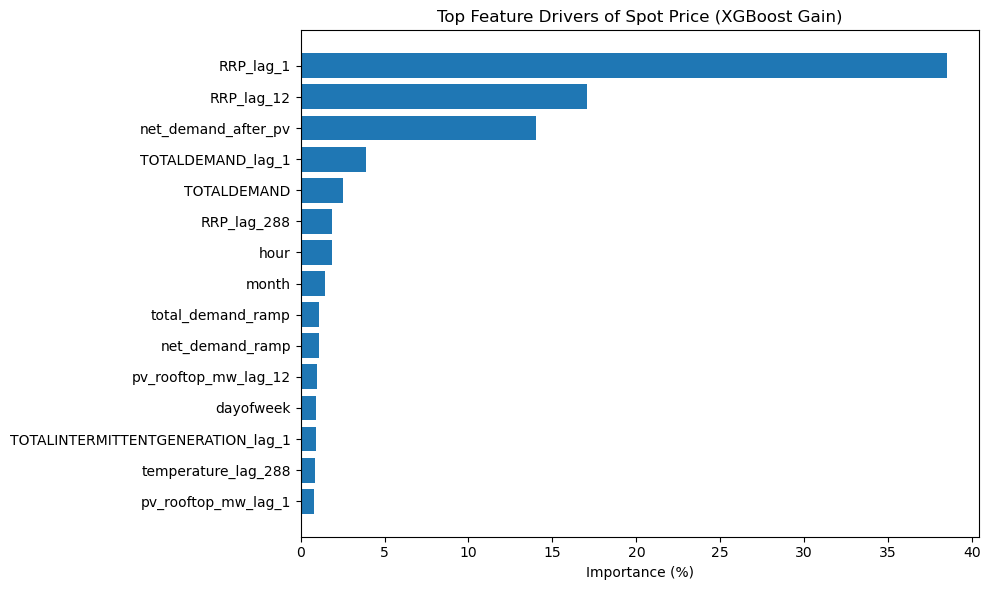

In [20]:
import matplotlib.pyplot as plt

# Select top features
top_n = 15
top_features = importance_df.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(
    top_features["feature"][::-1],
    top_features["importance_pct"][::-1]
)

plt.xlabel("Importance (%)")
plt.title("Top Feature Drivers of Spot Price (XGBoost Gain)")
plt.tight_layout()
plt.show()


## Business Conclusions — What Drives Spot Price Forecastability

### 1. Price Memory Dominates Short-Term Forecasting
The most influential features are short-term lagged prices, indicating strong price persistence and clustering in the electricity market. This confirms that recent price history is a critical signal for near-term forecasting and risk monitoring.

**Business implication:**  
Retailers and traders should closely monitor recent price movements, as volatility tends to persist over short horizons.

---

### 2. Net Demand Is a Strong Structural Driver
Net demand after rooftop PV emerges as a key contributor to price formation, outperforming total demand alone. This highlights the importance of accounting for embedded solar generation when assessing system stress.

**Business implication:**  
Forecasting and planning models that ignore rooftop PV risk underestimating price volatility, particularly during daylight-to-evening transition periods.

---

### 3. Ramps Signal Volatility and Risk Events
Ramp features (rapid changes in demand and renewable generation) contribute materially to the model’s predictive power. Sudden increases in net demand or drops in renewable output are closely associated with price spikes.

**Business implication:**  
Early detection of sharp ramps can serve as a real-time risk alert for market operators, enabling proactive hedging or dispatch decisions.

---

### 4. Time-of-Day Effects Shape Price Outcomes
Temporal features, especially hour of day, play a significant role, reflecting recurring daily stress patterns such as evening peak demand and reduced solar availability.

**Business implication:**  
Operational risk is not uniform throughout the day. Evening hours require heightened attention for price exposure and system adequacy.

---

### 5. Renewable Generation Influences Prices Indirectly
Renewable generation features have a meaningful but indirect impact, primarily through their interaction with net demand and ramp behaviour rather than as standalone drivers.

**Business implication:**  
Renewables reduce average prices but increase volatility risk when generation changes rapidly, reinforcing the need for integrated demand–renewable forecasting.

---

### Overall Takeaway
Spot price behaviour is driven by a combination of:
- Short-term price memory
- Net demand stress
- Rapid system changes
- Time-based operating regimes

This confirms that non-linear, interaction-aware models such as XGBoost are well-suited for electricity spot price forecasting and risk assessment.


### Step 4.8 — Random Forest Baseline

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [22]:
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_leaf=10,
    random_state=42,
    n_jobs=-1
)


In [23]:
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=15, min_samples_leaf=10, n_estimators=200,
                      n_jobs=-1, random_state=42)

In [24]:
rf_pred = rf_model.predict(X_test)

rf_rmse = mean_squared_error(
    y_test,
    rf_pred,
    squared=False
)

print("Random Forest RMSE (log space):", rf_rmse)


Random Forest RMSE (log space): 0.7238582091624444


/Users/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [25]:
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

# --- XGBoost RMSE ---
xgb_pred = xgb_model.predict(X_test)
xgb_rmse = mean_squared_error(y_test, xgb_pred, squared=False)

# --- Random Forest RMSE ---
rf_pred = rf_model.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)

print(f"XGBoost RMSE (log): {xgb_rmse:.4f}")
print(f"Random Forest RMSE (log): {rf_rmse:.4f}")


XGBoost RMSE (log): 0.7255
Random Forest RMSE (log): 0.7239


/Users/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [26]:
results = pd.DataFrame({
    "Model": ["XGBoost", "Random Forest"],
    "RMSE_log": [xgb_rmse, rf_rmse]
})

best_model = results.loc[results["RMSE_log"].idxmin()]

results, best_model


(           Model  RMSE_log
 0        XGBoost  0.725480
 1  Random Forest  0.723858,
 Model       Random Forest
 RMSE_log         0.723858
 Name: 1, dtype: object)

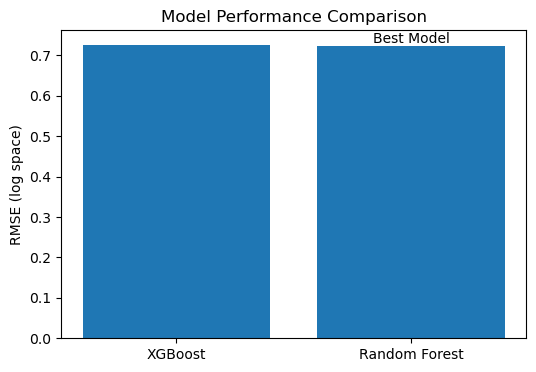

In [27]:
plt.figure(figsize=(6,4))
plt.bar(results["Model"], results["RMSE_log"])
plt.ylabel("RMSE (log space)")
plt.title("Model Performance Comparison")

# Highlight best model
plt.text(
    x=results["RMSE_log"].idxmin(),
    y=best_model["RMSE_log"],
    s="Best Model",
    ha="center",
    va="bottom"
)

plt.show()


In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

gbr_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

gbr_model.fit(X_train, y_train)

gbr_pred = gbr_model.predict(X_test)
gbr_rmse = mean_squared_error(y_test, gbr_pred, squared=False)

print("Gradient Boosting RMSE (log space):", round(gbr_rmse, 4))



Gradient Boosting RMSE (log space): 0.7101


/Users/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [29]:
from sklearn.linear_model import ElasticNet

enet_model = ElasticNet(
    alpha=0.001,
    l1_ratio=0.5,
    random_state=42
)

enet_model.fit(X_train, y_train)

enet_pred = enet_model.predict(X_test)
enet_rmse = mean_squared_error(y_test, enet_pred, squared=False)

print("ElasticNet RMSE (log space):", round(enet_rmse, 4))


ElasticNet RMSE (log space): 1.2489


/Users/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.791e+04, tolerance: 2.031e+01
  model = cd_fast.enet_coordinate_descent(
/Users/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [30]:
results = pd.DataFrame({
    "Model": [
        "Naive Baseline",
        "ElasticNet",
        "Random Forest",
        "Gradient Boosting",
        "XGBoost"
    ],
    "RMSE_log": [
        baseline_rmse,
        enet_rmse,
        rf_rmse,
        gbr_rmse,
        xgb_rmse
    ]
})

results.sort_values("RMSE_log")


,Model,RMSE_log
3,Gradient Boosting,0.710082
2,Random Forest,0.723858
4,XGBoost,0.725480
0,Naive Baseline,0.813178
1,ElasticNet,1.248905


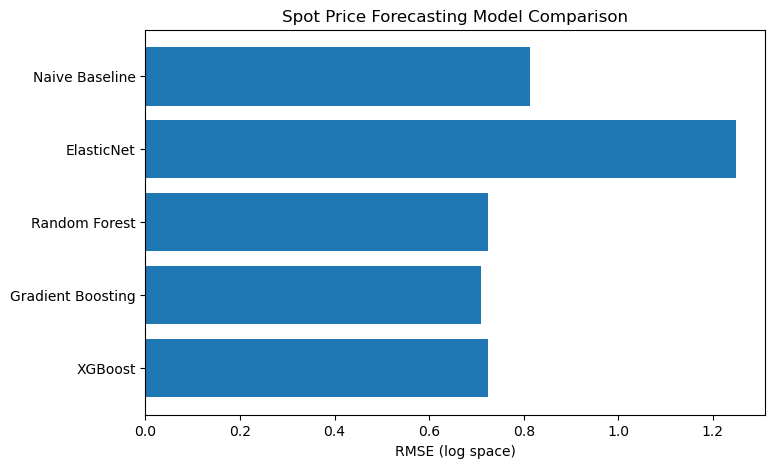

In [31]:
plt.figure(figsize=(8,5))
plt.barh(results["Model"], results["RMSE_log"])
plt.xlabel("RMSE (log space)")
plt.title("Spot Price Forecasting Model Comparison")
plt.gca().invert_yaxis()
plt.show()



In [32]:
[v for v in globals() if "xgb" in v.lower()]


['XGBRegressor', 'xgb_model', 'xgb_pred', 'xgb_rmse', 'xgb_pred_price']

In [33]:
# Predict in log space
y_pred_log = xgb_model.predict(X_test)

# Inverse log transform to original price scale
y_pred = np.expm1(y_pred_log)


In [34]:
# Start from test_df
pred_results = test_df.copy()

# Bring timestamp from index
pred_results = pred_results.reset_index().rename(columns={"index": "timestamp"})


In [35]:
pred_results["actual_rrp"] = pred_results["target_rrp"]
pred_results["predicted_rrp"] = y_pred


In [36]:
pred_results["absolute_error"] = (
    pred_results["actual_rrp"] - pred_results["predicted_rrp"]
)

pred_results["absolute_error_mwh"] = pred_results["absolute_error"].abs()

pred_results["percentage_error"] = (
    pred_results["absolute_error"] / pred_results["actual_rrp"]
).replace([np.inf, -np.inf], np.nan) * 100


In [37]:
pred_results = pred_results[
    [
        "timestamp",
        "predicted_rrp",
        "absolute_error_mwh",
        "percentage_error"
    ]
]


In [38]:
powerbi_master = df_model.copy()

powerbi_master = powerbi_master.merge(
    pred_results,
    on="timestamp",
    how="left"   # keeps ALL historical rows
)


In [39]:
powerbi_master.to_csv(
    "outputs/forecasts/powerbi_dataset_5min.csv",
    index=False
)

print("✅ powerbi_dataset_5min.csv exported with ALL months")


✅ powerbi_dataset_5min.csv exported with ALL months


In [40]:
powerbi_master.columns


Index(['timestamp', 'TOTALDEMAND', 'net_demand_after_pv', 'pv_rooftop_mw',
       'TOTALINTERMITTENTGENERATION', 'temperature', 'wind_speed', 'hour',
       'dayofweek', 'month', 'total_demand_ramp', 'net_demand_ramp',
       'renewable_ramp', 'abs_total_demand_ramp', 'abs_net_demand_ramp',
       'abs_renewable_ramp', 'RRP_lag_1', 'RRP_lag_12', 'RRP_lag_288',
       'TOTALDEMAND_lag_1', 'TOTALDEMAND_lag_12', 'TOTALDEMAND_lag_288',
       'net_demand_after_pv_lag_1', 'net_demand_after_pv_lag_12',
       'net_demand_after_pv_lag_288', 'pv_rooftop_mw_lag_1',
       'pv_rooftop_mw_lag_12', 'pv_rooftop_mw_lag_288',
       'TOTALINTERMITTENTGENERATION_lag_1',
       'TOTALINTERMITTENTGENERATION_lag_12',
       'TOTALINTERMITTENTGENERATION_lag_288', 'temperature_lag_1',
       'temperature_lag_12', 'temperature_lag_288', 'wind_speed_lag_1',
       'wind_speed_lag_12', 'wind_speed_lag_288', 'target_rrp',
       'target_log_rrp', 'predicted_rrp', 'absolute_error_mwh',
       'percentage_error'

In [41]:
import joblib

joblib.dump(xgb_model, "xgb_model.pkl")
print("Model saved")

Model saved
